In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # 引入seaborn库，用于绘制核密度估计图
from scipy.stats import norm

In [181]:
# 读取CSV文件
file_path = "C:/Users/lwy/Desktop/probability_theory/GradeLevelData_V3.csv"  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

In [182]:
# 提取学生出勤率列
attendance_column_name = 'AttendancePercent'  # 替换为你的CSV文件中出勤率列的列名
attendance_data = df[attendance_column_name]

In [183]:
# 清理数据，去除非数字数据
attendance_data = pd.to_numeric(attendance_data, errors='coerce')
attendance_data = attendance_data.dropna()

In [184]:
# 对数据进行排序
sorted_attendance_data = attendance_data.sort_values()

In [185]:
# 创建新的DataFrame并保存为新CSV文件
cleaned_df = pd.DataFrame({attendance_column_name: sorted_attendance_data})
cleaned_file_path = 'C:/Users/lwy/Desktop/probability_theory/cleaned_attendance_data.csv'  # 替换为你想保存的新CSV文件路径
cleaned_df.to_csv(cleaned_file_path, index=False)

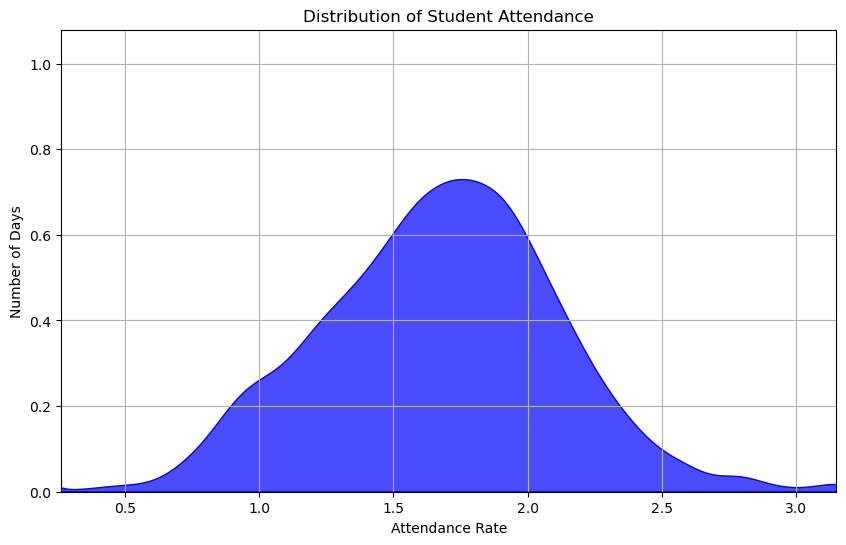

In [186]:
# 绘制统计条形图
plt.figure(figsize=(10, 6))
sns.kdeplot((np.log(100-sorted_attendance_data+1))**0.75, color='blue', fill=True, alpha=0.7)
plt.title('Distribution of Student Attendance')
plt.xlabel('Attendance Rate')
plt.ylabel('Number of Days')
plt.xlim((np.log(100-99.815+1))**0.75, (np.log(100-0+1))**0.75,)  # 替换为你想要的 x 轴范围
plt.grid(True)
plt.show()

In [187]:
clean_data = attendance_data[attendance_data <= 99.815]
transformed_data = (np.log(100-clean_data+1))**0.75

In [188]:
# 计算均值和方差
mean_value = np.mean(transformed_data)
variance_value = np.var(transformed_data)

print(f"均值: {mean_value}")
print(f"方差: {variance_value}")

均值: 1.6768478843329286
方差: 0.19168201631784487


In [189]:
# 生成一些 x 值
x = np.linspace(mean_value - 4 * np.sqrt(variance_value), mean_value + 4 * np.sqrt(variance_value), 1000)

# 计算正态分布的概率密度函数
y = norm.pdf(x, mean_value, np.sqrt(variance_value))

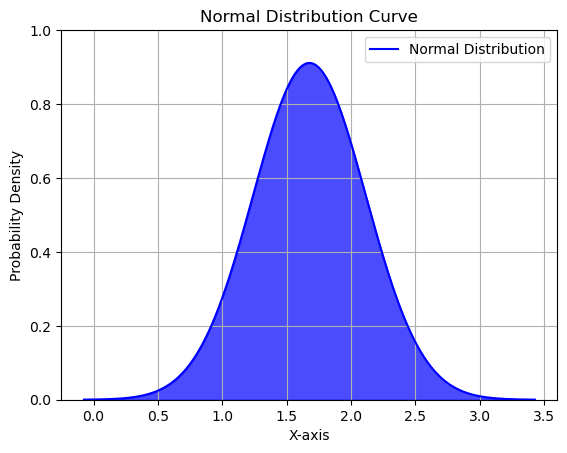

In [190]:
# 绘制正态分布曲线
plt.plot(x, y, label='Normal Distribution', color='blue')
plt.fill_between(x, y, color='blue', alpha=0.7)
plt.title('Normal Distribution Curve')
plt.xlabel('X-axis')
plt.ylabel('Probability Density')
plt.ylim(0, 1)  
plt.legend()
plt.grid(True)
plt.show()